 # Capstone Case Study

## Introduction
The Capstone case study is to combine the learnings from all the modules of the specialisation and use it in solving a real world problem. AAVAIL launched using a tiered, subscription-based service which showed promise, but conversations with users, especially those outside of US markets, prompted an experiment using an à la carte approach. This experiment was carried out mostly outside of the US and there are now a couple of years of data with a few thousand active users. The data are transaction-level purchases across 38 different countries and are invoiced in batches. Management has nearly decided to make the switch to the new model, but they find it difficult to predict monthly revenue. They have asked you to create a service that, at any point in time, will predict the revenue for the following month. They have also asked that the service be given the ability to project revenue for a specific country. To keep the development time reasonable you have been advised to limit your model to the ten countries with the most revenue.

## Part 1 - About The Data
The data for this case study come from the online retail data set and are available through the UCI Machine Learning Repository. The original data were published as a study that used RFM model to explore customer segmentation in the data set [1]. The data presented in this study are derived from this data set with simulated features and re-named columns to align with the AAVAIL case study.

### 1. Assimilate the business scenario and articulate testable hypotheses.

The business scenario is mainly to understand the impact of moving from standard tiered subscription model to more customised model for different countries. The data science problem here is regression problem (supervised learning) to understand the impact of moving to new model in terms of monthly revenue. The following hypotheses can be made for the above business scenario

a. Null Hypothesis - There is no change in the revenue from the existing and new model for all the countries compared to previous month

b. Hypothesis 1 - The revenue for top 10 countries by usage are not impacted but other countries will see decreased revenues compared to previous month

c. Hypothesis 2 - The revenue for all the countries will increase as conversions will improve due to customized subscription model compared to previous month

d. Hypothesis 3 - The revenue for all the countries will decrease as customized subscription model will reduce revenue per user compared to previous month

### 2. State the ideal data to address the business opportunity and clarify the rationale for needing specific data.

There are two kind of information required to solve the problem - 

a. The country wise transaction data for existing users which will provide the way current subscription is being used in each country and also see how many users will be impacted by the new subscription model

b. Data to show how the current subscribed users fit in overall demography of the country, this is to avoid hyper-customization for small part of demography which might be forming the majority of the current subscription base

### 3. Create a python script to extract relevant data from multiple data sources, automating the process of data ingestion.

In [4]:
!wget https://github.com/aavail/ai-workflow-capstone/archive/master.zip
!unzip ../data/master.zip
!ls

ai-workflow-capstone-master  master.zip


In [9]:
import os
import sys
import pandas as pd
import numpy as np
sys.path.append("ai-workflow-capstone-master/solution-guidance")
from cslib import *

In [10]:
data_dir = os.path.join(".","ai-workflow-capstone-master")
cs_train_folder = os.path.join(data_dir,"cs-train")
df = fetch_data(cs_train_folder)
df.head()

,country,customer_id,day,invoice,month,price,stream_id,times_viewed,year,invoice_date
0,United Kingdom,15808.0,28,489644,11,1.95,85099B,6,2017,2017-11-28
1,United Kingdom,13085.0,28,489434,11,6.75,79323P,12,2017,2017-11-28
2,United Kingdom,13085.0,28,489434,11,6.75,79323W,12,2017,2017-11-28
3,United Kingdom,13085.0,28,489434,11,2.10,22041,21,2017,2017-11-28
4,United Kingdom,13085.0,28,489434,11,1.25,21232,5,2017,2017-11-28


### 4. Investigate the relationship between the relevant data, the target and the business metric.

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn')\n",
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

In [67]:
# top 10 countries by revenue
countries = df['country'].values

df1 = pd.crosstab(df['country'], df['year'], values=df['price'], aggfunc='sum', margins=True, margins_name='total')
df1 = df1.sort_values('total', ascending=False)
print(df1.head(11))

year                 2017          2018          2019         total
country                                                            
total           198307.76  2.526013e+06  1.189877e+06  3.914197e+06
United Kingdom  187241.07  2.272136e+06  1.062137e+06  3.521514e+06
EIRE              4433.09  7.439830e+04  2.823782e+04  1.070692e+05
Germany           1525.79  3.055433e+04  1.719170e+04  4.927182e+04
France            1200.34  2.453834e+04  1.482646e+04  4.056514e+04
Norway             123.28  3.471640e+04  3.655070e+03  3.849475e+04
Spain              845.22  7.311560e+03  7.884210e+03  1.604099e+04
Hong Kong             NaN  8.715380e+03  5.737190e+03  1.445257e+04
Portugal           294.35  4.292260e+03  8.942060e+03  1.352867e+04
Singapore             NaN  3.725100e+02  1.280341e+04  1.317592e+04
Netherlands        384.26  8.948110e+03  2.990430e+03  1.232280e+04


In [68]:
# month wise revenue distribution
df['month'] = df['invoice_date'].map(lambda x: x.month)
df2 = pd.crosstab(df['country'], [df['year'], df['month']], values=df['price'], aggfunc='sum', margins=True, margins_name='total')
df2 = df2.sort_values('total', ascending=False)
df2 = df2.head(11)
df2 = df2.transpose()
print(df2)

country            total  United Kingdom       EIRE    Germany    France  \
year  month                                                                
2017  11       41152.750    3.944559e+04     570.21    156.480    352.42   
      12      157155.010    1.477955e+05    3862.88   1369.310    847.92   
2018  1       183680.394    1.567415e+05   14825.74   2121.430   1564.87   
      2       116345.374    1.033863e+05    2523.79   1570.700   1694.52   
      3       257428.441    2.114910e+05    4686.84   2427.520    911.74   
      4       116642.342    1.032061e+05    3042.55   2352.251    705.27   
      5       155748.790    1.364354e+05    3761.58   1469.110   1475.30   
      6       229099.440    2.178495e+05    3044.98   2937.690   1214.97   
      7       108378.730    9.146041e+04    4133.82   4130.510   4783.86   
      8       156605.000    1.358923e+05    2789.03   1535.460   3351.60   
      9       222500.981    2.046239e+05    8468.86   2286.980   1489.05   
      10    

### 5. Articulate your findings using a deliverable with visualizations.

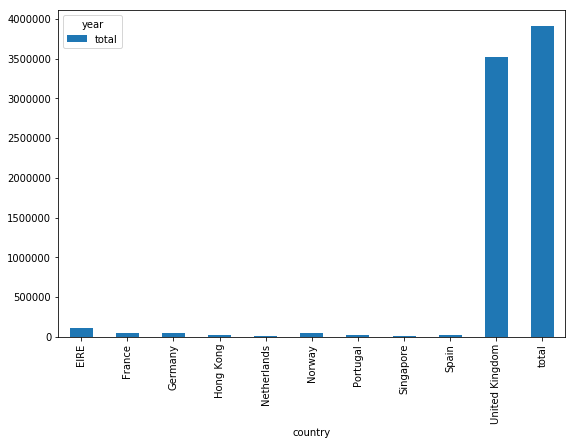

In [72]:
# plot the top 10 countries by revenue
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
table_c = pd.pivot_table(df1.head(11), index='country', values='total')
table_c.plot(kind='bar',ax=ax1)

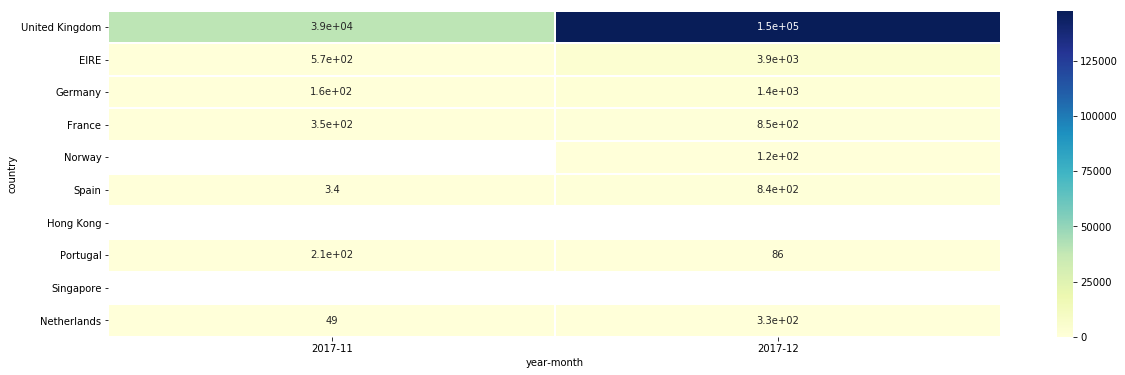

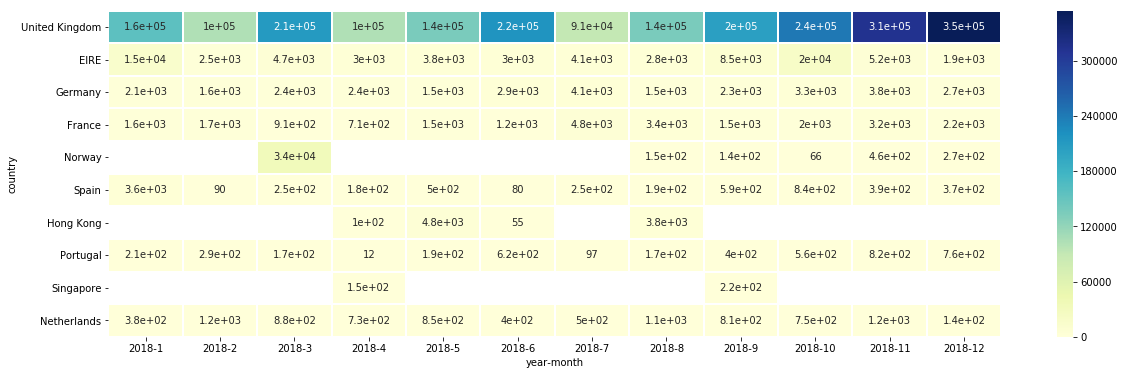

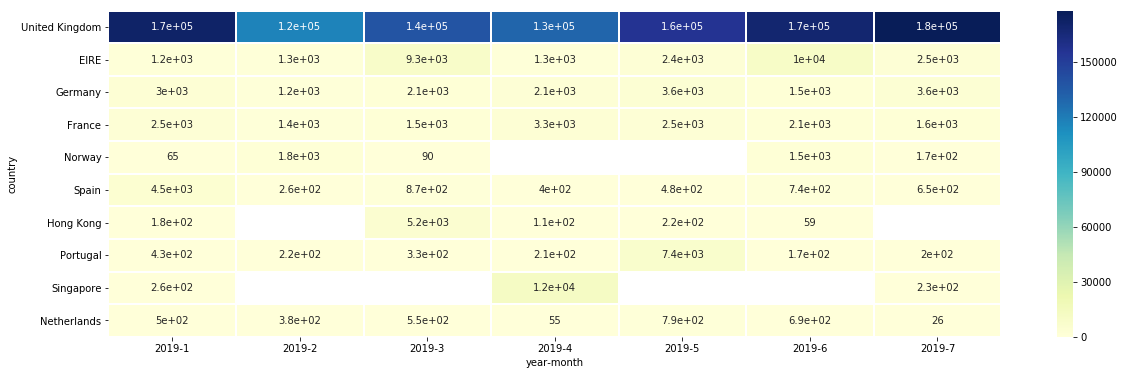

In [75]:
# show the month wise heat map
import seaborn as sns
plt.figure(figsize=(20,6))
df3=df2.transpose()
df3 = df3.drop('total')
sns.heatmap(df3.filter(regex='2017'), cmap="YlGnBu", annot=True, cbar=True, linewidths=1)
plt.figure(figsize=(20,6))
sns.heatmap(df3.filter(regex='2018'), cmap="YlGnBu", annot=True, cbar=True, linewidths=1)
plt.figure(figsize=(20,6))
sns.heatmap(df3.filter(regex='2019'), cmap="YlGnBu", annot=True, cbar=True, linewidths=1)

In [76]:
### data spanning how many days
df_invoice_dates = df['invoice_date'].unique()
span_days = df_invoice_dates.max() - df_invoice_dates.min()
span_days = span_days.astype('timedelta64[D]')
days_num = span_days/np.timedelta64(1, 'D')
print('Number of days: ',days_num)

Number of days:  610.0


In [77]:
df_ts=convert_to_ts(df)
df_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 7 columns):
date               607 non-null datetime64[ns]
purchases          607 non-null int64
unique_invoices    607 non-null int64
unique_streams     607 non-null int64
total_views        607 non-null int64
year_month         607 non-null object
revenue            607 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 33.3+ KB


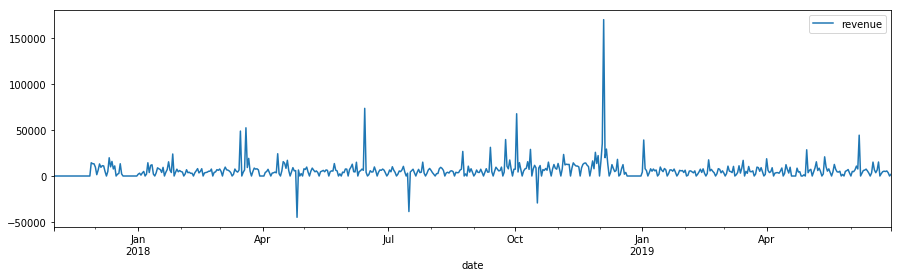

In [123]:
#df_ts.head()
df_ts.plot(x="date", y="revenue", figsize=(15,4))

## Part - 2 Model Building & Selection

### 1. State the different modeling approaches that you will compare to address the business opportunity.
a. Random Forest is being used 

In [129]:
!pip install joblib

Uninstalling logger-1.4:
  Successfully uninstalled logger-1.4


In [128]:
from model import *
## train the model
print("TRAINING MODELS")
model_train(cs_train_folder,test=True)
!ls models

ImportError: cannot import name 'update_predict_log'